In [ ]:
#Import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Modules

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense



# Reading Images

In [ ]:
base_dir = '/content/drive/My Drive/MLandAI/cancer'

train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

bkl_train_dir =os.path.join(train_dir, 'Benign keratosis')  
melanoma_train_dir =os.path.join(train_dir, 'melanoma')  
no_train_dir =os.path.join(train_dir, 'No cancer')  

bkl_val_dir =os.path.join(validation_dir, 'Benign keratosis')
melanoma_val_dir = os.path.join(validation_dir, 'melanoma') 
no_val_dir = os.path.join(validation_dir, 'No cancer') 



In [ ]:
num_bkl_train_dir = len(os.listdir(bkl_train_dir))
num_melanoma_train_dir = len(os.listdir(melanoma_train_dir))
num_no_train_dir = len(os.listdir(no_train_dir))

num_bkl_val_dir = len(os.listdir(bkl_val_dir))
num_melanoma_val_dir = len(os.listdir(melanoma_val_dir))
num_no_val_dir = len(os.listdir(no_val_dir))

total_train = num_bkl_train_dir + num_melanoma_train_dir + num_no_train_dir
total_val = num_bkl_val_dir + num_melanoma_val_dir + num_no_val_dir

print('total training Benign keratosis images:', num_bkl_train_dir)
print('total training melanoma images:', num_melanoma_train_dir)
print('total training No cancer images:', num_no_train_dir)


print('total val Benign keratosis images:', num_bkl_val_dir)
print('total val melonama images:', num_melanoma_val_dir)
print('total val No cancer images:', num_no_val_dir)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Benign keratosis images: 15
total training melanoma images: 15
total training No cancer images: 15
total val Benign keratosis images: 5
total val melonama images: 5
total val No cancer images: 5
--
Total training images: 45
Total validation images: 15


# Train, Test and Validation Set Generation


### Train Generator - (Pre-Processing) or augmentation

In [ ]:
train_image_generator=ImageDataGenerator(rescale=1./255,
                                        rotation_range=45,
                                        width_shift_range=.15,
                                        height_shift_range=.15,
                                        zoom_range=0.5,
                                        horizontal_flip = True,
                                        vertical_flip = False)
print(train_image_generator)

![alt text](https://miro.medium.com/max/2628/0*iqlm0f7_ZVlFOU9N.png)

### Validation Generator - (Pre-processing)

In [ ]:
validation_image_generator = ImageDataGenerator(rescale=1./255) 

![alt text](https://media-exp1.licdn.com/dms/image/C4D12AQHGHIyXtNTDLg/article-cover_image-shrink_423_752/0/1520100535022?e=1612396800&v=beta&t=CYIM778wtNmrJEQsKaP4TpxOD6Jws8P4YOWz1Yv6qYEx)

In [ ]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=3,
                                                        directory=train_dir,
                                                        shuffle=True,
                                                        target_size=(150,150),
                                                        class_mode='binary',
                                                        color_mode='rgb')

val_data_gen=validation_image_generator.flow_from_directory(batch_size=3,
                                                           directory=validation_dir,
                                                           target_size=(150,150),
                                                           class_mode='binary',
                                                        color_mode='rgb')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [ ]:
def classLabel(source=None):
        datagen = ImageDataGenerator(rescale=1. / 255)
        data_generator = datagen.flow_from_directory(
        source)
        class_dictionary = data_generator.class_indices
        return data_generator, class_dictionary
      
      
labels = classLabel(train_dir)
print(labels)

Found 45 images belonging to 3 classes.
(<tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x7f3b029c7e90>, {'Benign keratosis': 0, 'No cancer': 1, 'melanoma': 2})


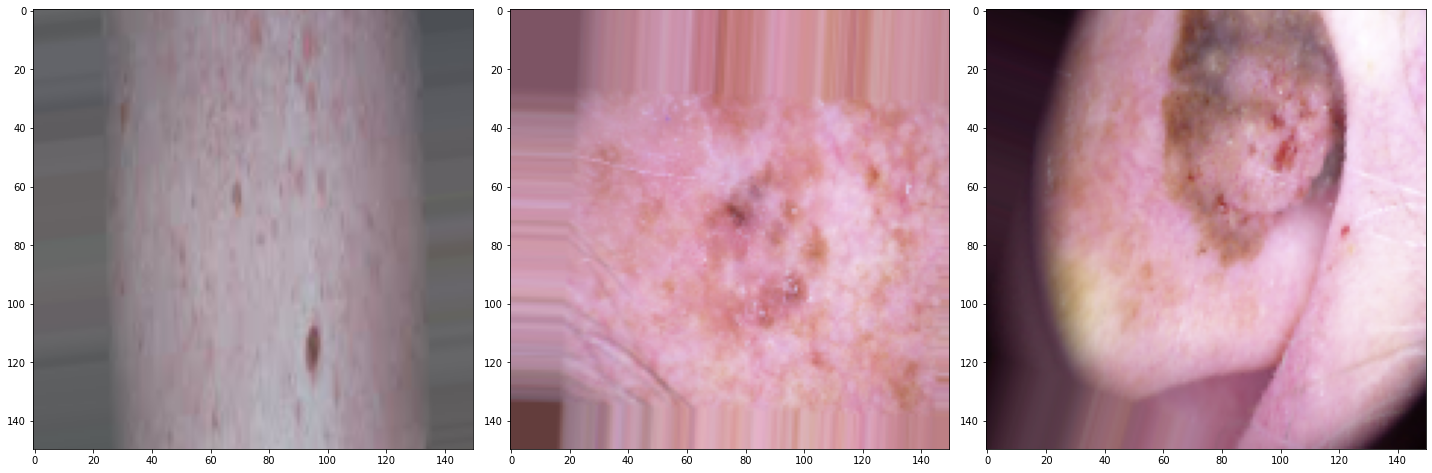

In [ ]:
sample_training_images, _ = next(train_data_gen) 

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:3])

# Model Training

In [ ]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3,))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])



In [ ]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0

In [ ]:
history = model.fit_generator(
            train_data_gen,
            validation_data = val_data_gen,
            steps_per_epoch = 3,
            epochs = 100,
            validation_steps = 3,
            verbose = 2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
3/3 - 39s - loss: 3.4928 - accuracy: 0.1111 - val_loss: 2.0659 - val_accuracy: 0.5556
Epoch 2/100
3/3 - 4s - loss: 4.0017 - accuracy: 0.2222 - val_loss: 1.1001 - val_accuracy: 0.4444
Epoch 3/100
3/3 - 5s - loss: 1.0340 - accuracy: 0.4444 - val_loss: 1.1064 - val_accuracy: 0.1111
Epoch 4/100
3/3 - 3s - loss: 1.1979 - accuracy: 0.4444 - val_loss: 1.0929 - val_accuracy: 0.3333
Epoch 5/100
3/3 - 2s - loss: 1.1128 - accuracy: 0.2222 - val_loss: 1.0974 - val_accuracy: 0.4444
Epoch 6/100
3/3 - 2s - loss: 1.0889 - accuracy: 0.3333 - val_loss: 1.1006 - val_accuracy: 0.3333
Epoch 7/100
3/3 - 1s - loss: 1.0867 - accuracy: 0.4444 - val_loss: 1.0901 - val_accuracy: 0.3333
Epoch 8/100
3/3 - 0s - loss: 1.1179 - accuracy: 0.1111 - val_loss: 1.1006 - val_accuracy: 0.2222
Epoch 9/100
3/3 - 1s - loss: 1.0943 - accuracy: 0.3333 - val_loss: 1.0909 - val_accuracy: 0.4444
Epoch 10/100
3/3 - 0s - loss: 1.0940 - accuracy: 0.3333 - val_loss: 1.0956 - val_accuracy: 0.4444
Epoch 11/100
3/3 - 1s - loss

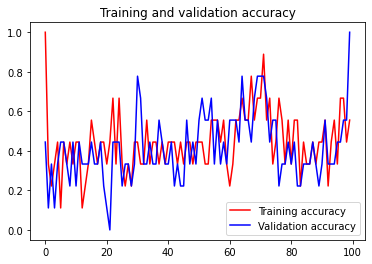

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()